# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [11]:
print(data.shape)
print(data.isna().sum())
print(data.duplicated().sum())
print(data.info())

data.head()

(5391, 6)
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None
          Rank
count 5,391.00
mean  2,696.00
std   1,556.39
min       1.00
25%   1,348.50
50%   2,696.00
75%   4,043.50
max   5,391.00


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [47]:
data.describe() 
# avg prod budget is 31 mln , and makes 89 mln gross (3x of costs)
# min worldwide and domestic are 0 (data missing)
# bottom 25% seem to loose money, as their prod costs are 5 mln and gross worldwide 3.8 mln (75% of prod costs)
# highest prod budget is 425 mln and the highest gross worldwide is 2.7 bln (wow) --> Avatar
# lowest budget grosses under prod costs , the highest 2.5x of the prod costs

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [13]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.describe()

,Rank
count,"5,391.00"
mean,"2,696.00"
std,"1,556.39"
min,1.00
25%,"1,348.50"
50%,"2,696.00"
75%,"4,043.50"
max,"5,391.00"


In [15]:
data.Release_Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5391 entries, 0 to 5390
Series name: Release_Date
Non-Null Count  Dtype         
--------------  -----         
5391 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 42.2 KB


In [16]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,1916-05-09,Intolerance,"$385,907",$0,$0
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1925-01-01,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [19]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$','')

data.head()

/var/folders/0v/wjvt31y95mg76qxs__77gtw80000gn/T/ipykernel_38534/934106064.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$','').replace(',','')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"$110,000","$11,000,000","10,000,000"
1,5140,1916-05-09,Intolerance,"$385,907",$0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","8,000,000"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","3,000,000"
4,5222,1925-01-01,The Big Parade,"$245,000","$22,000,000","11,000,000"


In [21]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(',','')
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"$110,000","$11,000,000",10000000
1,5140,1916-05-09,Intolerance,"$385,907",$0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000",8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000",3000000
4,5222,1925-01-01,The Big Parade,"$245,000","$22,000,000",11000000


In [24]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$','')
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',','')

data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$','')
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(',','')

data.head()

/var/folders/0v/wjvt31y95mg76qxs__77gtw80000gn/T/ipykernel_38534/767845077.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$','')
/var/folders/0v/wjvt31y95mg76qxs__77gtw80000gn/T/ipykernel_38534/767845077.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$','')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [39]:
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [50]:
data.sort_values(by='USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [41]:
print(f'Average production budget of the films {data.USD_Production_Budget.mean()}')
print(data.USD_Worldwide_Gross.mean())

31113737.57837136


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [45]:
print(data[data.USD_Domestic_Gross == 0].count()) # --> 512
print(data[data.USD_Domestic_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False).head())

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64
      Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388              175000000                    0                   0  
5387              160000000                    0                   0  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5090               80000000              4547660                   0  


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [46]:
print(data[data.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False).head())

      Rank Release_Date        Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31        Singularity              175000000   
5387   126   2018-12-18            Aquaman              160000000   
5384   321   2018-09-03  A Wrinkle in Time              103000000   
5385   366   2018-10-08     Amusement Park              100000000   
5058   880   2015-11-12   The Ridiculous 6               60000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0  


In [52]:
data[data.USD_Production_Budget == 1100].head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [53]:
data.USD_Production_Budget.min()

1100

### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [57]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0').sort_values('USD_Worldwide_Gross', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [58]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [62]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of future releases: {len(future_releases)}')
future_releases

Number of future releases: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [64]:
data_clean = data.drop(future_releases.index)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.5+ KB


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [69]:
len(data_clean.query('USD_Worldwide_Gross < USD_Production_Budget'))/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [71]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



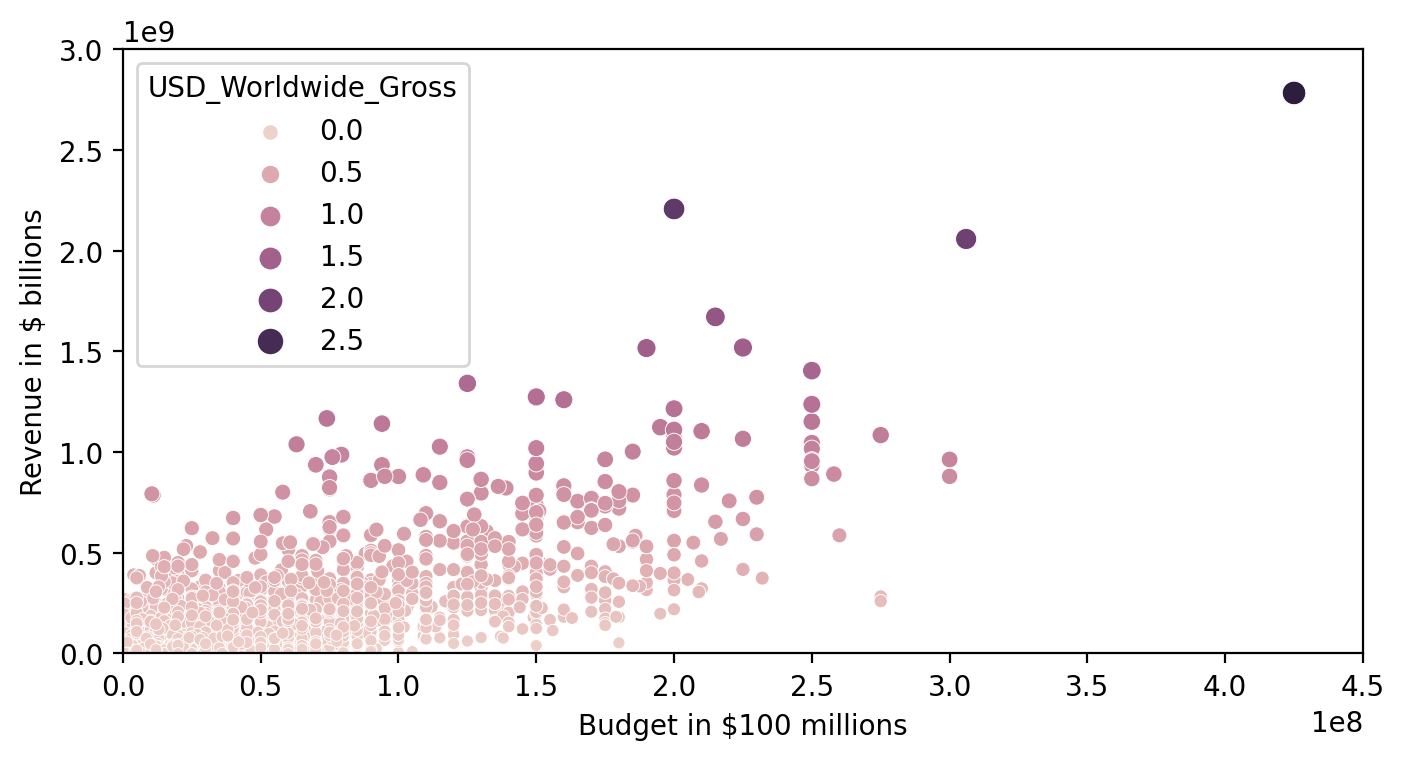

In [77]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                y='USD_Worldwide_Gross',
                x='USD_Production_Budget',
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [86]:
data_clean['Decade'] = (data_clean.Release_Date.dt.year//10)*(10)

In [87]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [90]:
old_marker = pd.Timestamp('1969-12-31')

In [130]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
 6   Decade                 5384 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 294.6+ KB


In [131]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Release_Date > old_marker]

In [132]:
print(len(old_films))
print(len(new_films))

153
5231


In [135]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


In [127]:
new_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

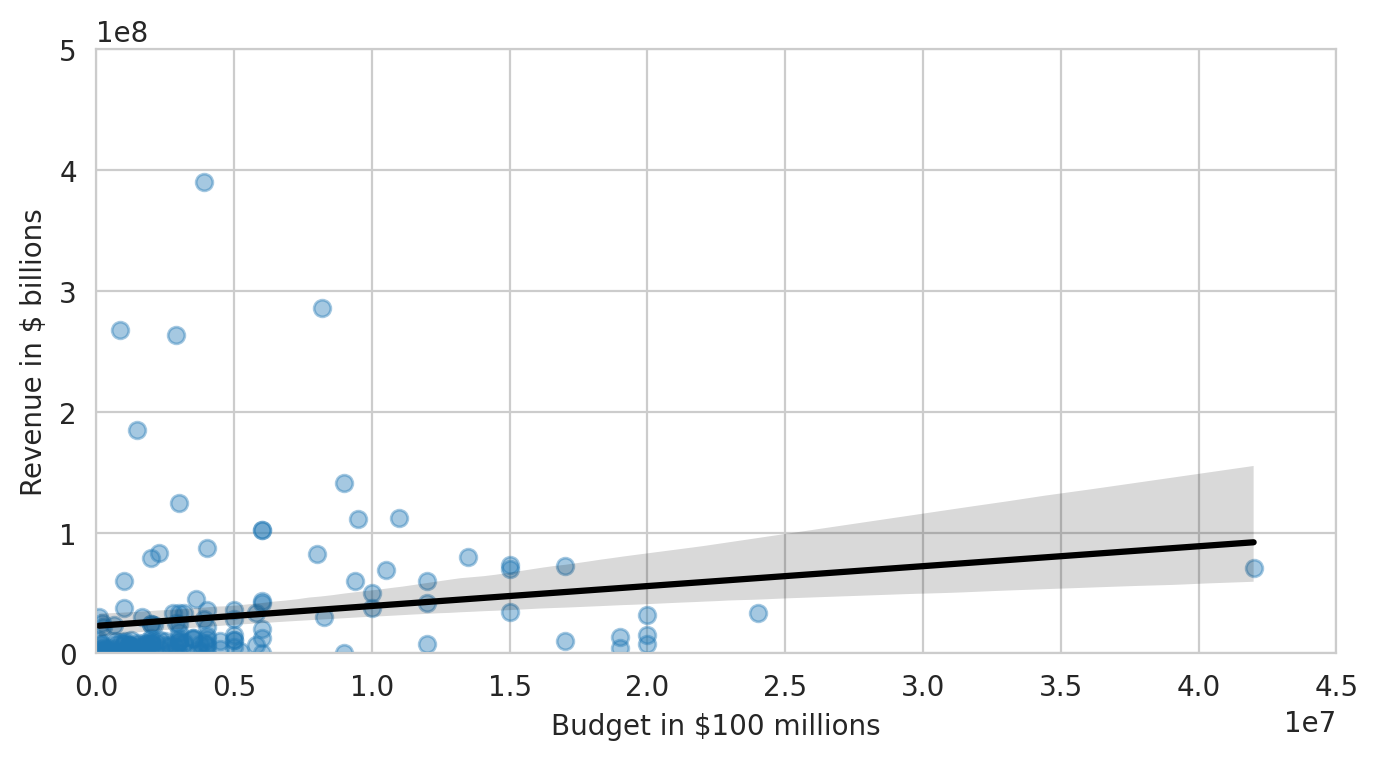

In [137]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
       old_ax = sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'black'})
       old_ax.set(ylim=(0, 500000000),
              xlim=(0, 45000000),
              ylabel='Revenue in $ billions',
              xlabel='Budget in $100 millions',
              )


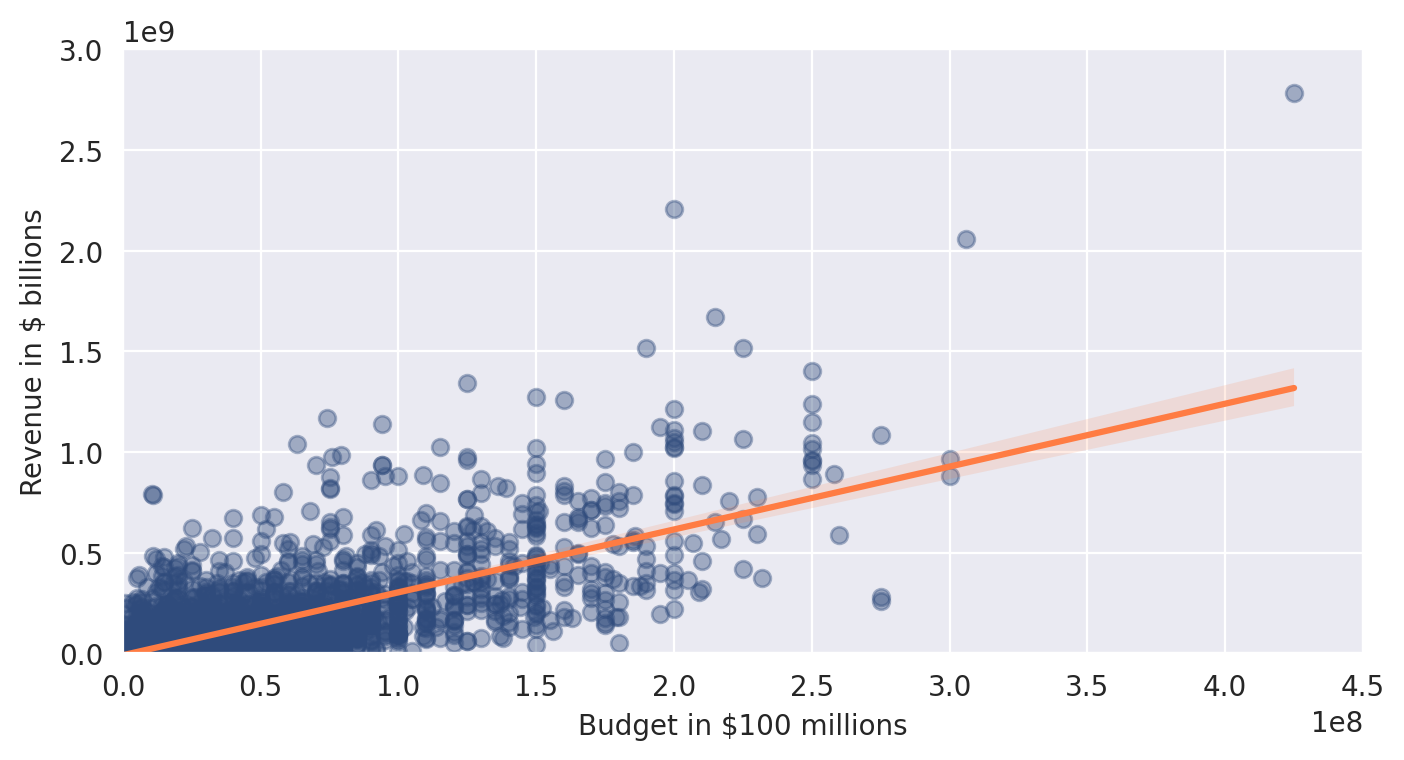

In [115]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    old_ax = sns.regplot(data=new_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws = {'alpha': 0.4, 'color':'#2f4b7c'}, line_kws = {'color': '#ff7c43'})
    old_ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [117]:
regression = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [118]:
# Explanatory Variable or Feature:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


In [119]:
regression.fit(X, y)

LinearRegression()

In [120]:
regression.intercept_

array([-8650768.00661096])

In [121]:
regression.coef_

array([[3.12259592]])

In [122]:
# R-squared
regression.score(X, y)

0.5577032617720403

### Old movies

In [141]:
regression_old = LinearRegression()
# Explanatory Variable or Feature:
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression_old.fit(X_old, y_old)

print(f'The intercept is: {regression_old.intercept_}')
print(f'The slope coefficient is: {regression_old.coef_}')
print(f'The r-squared is: {regression_old.score(X_old, y_old)}')

The intercept is: [22821538.63508039]
The slope coefficient is: [[1.64771314]]
The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
print(regression_old.predict([[350000000]]))
print(regression.predict([[350000000]]))

In [154]:
budget = 350000000
revenue_estimate = regression_old.intercept_[0] + regression_old.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated erevenue for a $350 mln film is around ${revenue_estimate:.10}.')

The estimated erevenue for a $350 mln film is around $600000000.0.
